In [268]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## pyt_var For python variables

## mod for modifications 


data should be changed - use real time data . Perhaps  , scrape the data to get real time minute updated values, perhaps modify code below

NEW DATA SHOULD BE LONG ENOUGH TO EXHBIT LONG TERM TRENDS . ( MORE THAN 1 YEAR - AT LEAST MINUTE PER MINUTE ) 

In [269]:
'''
import requests
import json

def get_stock_price(symbol):
    """get a stock price from yahoo finance"""

    url = "https://query1.finance.yahoo.com/v8/finance/quote?symbols=" + symbol
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)    
    data = json.loads(response.text)
    
    return data['quoteResponse']['result'][0]['regularMarketPrice']


print(get_stock_price('AAPL'))
'''


'\nimport requests\nimport json\n\ndef get_stock_price(symbol):\n    """get a stock price from yahoo finance"""\n\n    url = "https://query1.finance.yahoo.com/v8/finance/quote?symbols=" + symbol\n    headers = {\'User-Agent\': \'Mozilla/5.0\'}\n    response = requests.get(url, headers=headers)    \n    data = json.loads(response.text)\n    \n    return data[\'quoteResponse\'][\'result\'][0][\'regularMarketPrice\']\n\n\nprint(get_stock_price(\'AAPL\'))\n'

In [270]:
tick_name = 'AAPL'  #This should be python var pyt_var
sec = yf.Ticker(tick_name)

In [271]:
price_data = np.array(sec.history(period='5y', interval='1d')['Close'].iloc[:-200]).reshape(-1,1)
real_price_data = np.array(sec.history(period='5y',interval='1d')['Close']).reshape(-1,1)

### I would like to be able to predict data. Here I will free up 30 days, which I will forecast. I thus remove 5*60 last values. Ideally, days should be minutes ( or sec).
Also, only close value is kept 

In [272]:
dates =sec.history(period = '5y',interval = '1d').index
dates = np.array(pd.to_datetime(dates).strftime('%Y')).reshape(-1,1)
dates =sec.history(period = '5y',interval = '1d').index
syn_dates = np.array(pd.to_datetime(dates[:-200]).strftime('%Y')).reshape(-1,1)

In [273]:
print(syn_dates.shape,"associated with " , price_data.shape, "\n and", dates.shape ,"With ", real_price_data.shape )

(1059, 1) associated with  (1059, 1) 
 and (1259,) With  (1259, 1)


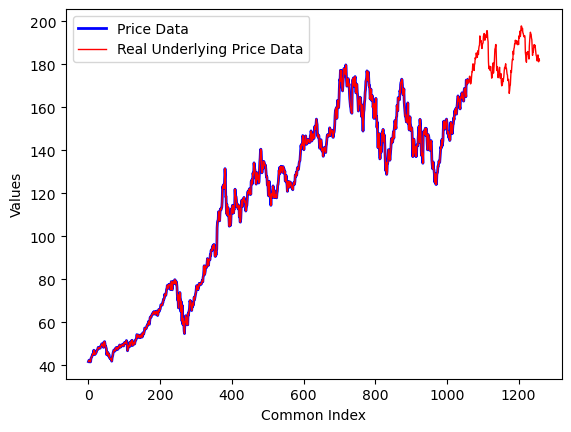

In [274]:
plt.plot(price_data, label='Price Data', color='blue', linewidth=2)
plt.plot(real_price_data,label='Real Underlying Price Data', color='red', linewidth=1)   # mod dependends on the updated request 

plt.xlabel('Common Index')
plt.ylabel('Values')
plt.legend()
plt.show()

#### Naive AR(q) models 

REVOIR APRES AVOIR FINIS AR1

In [136]:
q_val = 2 # pyt_var

class LinearAutoRegression:
    
    def __init__(self,order = 1 , estimation_method = 'OLS' ):
        self.order = order
        self.estimation_method = estimation_method
        
    def set_params(self, **params):
        for param in params.keys():
            setattr(self, param, params[param])
        return self
    
    
    def build_ar(self, X_trn, X_tst):
        X_trn , X_tst = np.array(X_trn) , np.array(X_tst)
        q = self.order
        self.dep_var_trn , self.dep_var_tst = X_trn[q:, 0].reshape(-1,1) , X_tst[q:,0].reshape(-1,1)
        self.ind_var_trn  = np.array([X_trn[i:i+q, 0] for i in range(len(X_trn)-q)]) 
        self.ind_var_tst = np.array([X_tst[i:i+q, 0] for i in range(len(X_tst)-q)]) 
        return self.dep_var_trn, self.dep_var_tst, self.ind_var_trn, self.ind_var_tst 
    
        
    def fit(self):
        X =self.ind_var
        y =self.dep_var
        if self.estimation_method == 'OLS':
            self.model = LinearRegression().fit(X,y)
            

    def predict(self):
        X_tst = self.ind_var_tst
        return self.model.predict(X_tst)

Revoir apres avoir finis ar1

Now

In [275]:
print("shorter price is of dim : " ,price_data.shape, "\nlonger is of dim : " , real_price_data.shape) 

shorter price is of dim :  (1059, 1) 
longer is of dim :  (1259, 1)


without validation I will try p=3 .

In [276]:
X_trn = price_data
data_tst = real_price_data[len(price_data):,:]
print("X test dim are ", X_trn.shape, "\nX train dimensions are ", data_tst.shape)

X test dim are  (1059, 1) 
X train dimensions are  (200, 1)


In [277]:
q = 3      #pyt_var
dep_var = X_trn[q:,:]
ind_var = np.vstack([X_trn[q-p:-p, 0] for p  in range(1, q+1)]).T

In [278]:
#tout est accordé
#print(f"The first 10 values of the training data are \n{X_trn[:10,:]} \n\n\n\nand the last 10 values are \n{X_trn[-10:,:]}")
#print(f"\n\n\nThe first 5 and last 5 values of dep var are {dep_var[:5,:]} and {dep_var[-5:,:]} \n\n\n\nThe first 5 obs and last 5 obs of the ind varable are {ind_var[:5,:]} and {ind_var[-5:,:]}")

In [279]:
 from sklearn.linear_model import LinearRegression

In [280]:
print(ind_var.shape, dep_var.shape)

(1056, 3) (1056, 1)


In [281]:
ols_reg_ar = LinearRegression().fit(ind_var,dep_var)


In [282]:
#Bien accordé
print(f"This results in the following coefficients {ols_reg_ar.coef_} and the following intercept {ols_reg_ar.intercept_}")

This results in the following coefficients [[0.93867725 0.02487019 0.03426249]] and the following intercept [0.38754434]


In [283]:
ind_tst[-q:,:]

array([[170.7668457 , 173.30024719, 171.95373535, 170.83909038,
        173.20921053, 171.98341783, 170.90797469, 173.12471796,
        172.00995147, 170.97362681, 173.04634058, 172.03362908,
        171.0361733 , 172.97367595, 172.0547194 , 171.09573875,
        172.90634657, 172.0734689 , 171.15244546, 172.84399846,
        172.09010348, 171.20641318, 172.78629976, 172.10483003,
        171.25775887, 172.73293947, 172.11783796, 171.30659656,
        172.68362618, 172.12930045, 171.35303717, 172.63808696,
        172.13937581, 171.39718842, 172.59606623, 172.14820857,
        171.43915474, 172.55732473, 172.15593062, 171.47903723,
        172.52163856, 172.16266218, 171.5169336 , 172.48879823,
        172.16851274, 171.55293817, 172.45860779, 172.1735819 ,
        171.58714186, 172.43088404, 172.17796021, 171.61963222,
        172.40545569, 172.18172985, 171.65049348, 172.38216269,
        172.18496537, 171.67980652, 172.36085549, 172.18773427,
        171.70764902, 172.34139441, 172.

In [284]:
ind_tst = np.array(X_trn[-q:,:]).T
for i in range(100):
    prediction = ols_reg_ar.predict(ind_tst[:,-q:])
    ind_tst = np.concatenate((ind_tst, prediction),axis=1)


In [285]:
import matplotlib.pyplot as plt 

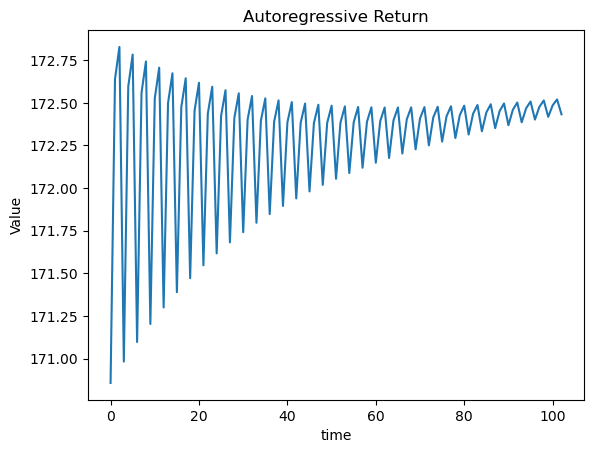

In [286]:
plt.plot(ind_tst.flatten())
plt.xlabel('time')
plt.ylabel('Value')
plt.title('Autoregressive Return')
plt.show()

In order to draw the AR process - I will concatenate the predicted values to the price_data
I need to remove the last 3 beore concat


In [287]:
predicted_line = np.concatenate((price_data[:-3,:],ind_tst.T), axis=0)
print(predicted_line)


[[ 41.67281723]
 [ 42.11086273]
 [ 42.32265091]
 ...
 [172.48492655]
 [172.51982831]
 [172.43260087]]


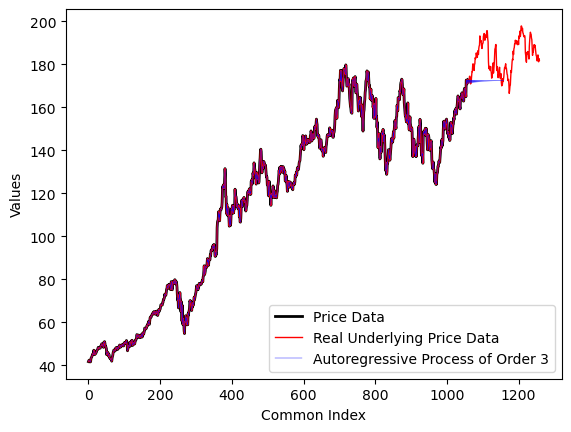

In [290]:
plt.plot(price_data, label='Price Data', color='black', linewidth=2)
plt.plot(real_price_data,label='Real Underlying Price Data', color='red', linewidth=1)   # mod dependends on the updated request 
plt.plot(predicted_line,label='Autoregressive Process of Order 3', color = "blue" , linewidth = 0.3)




plt.xlabel('Common Index')
plt.ylabel('Values')
plt.legend()
plt.show()